In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_excel('rainfall.xlsx')
data

,State,District,Date,Year,Month,Avg_rainfall
0,Andaman & Nicobar,Nicobars,2020-01-24,2020,1,NaN
1,Andaman & Nicobar,Nicobars,2020-01-26,2020,1,NaN
2,Andaman & Nicobar,Nicobars,2020-01-01,2020,1,0.065982
3,Andaman & Nicobar,Nicobars,2020-01-02,2020,1,NaN
4,Andaman & Nicobar,Nicobars,2020-01-03,2020,1,0.107702
...,...,...,...,...,...,...
911175,West Bengal,Purulia,2023-07-19,2023,7,5.081730
911176,West Bengal,Purulia,2023-07-20,2023,7,7.339294
911177,West Bengal,Purulia,2023-07-21,2023,7,5.737887
911178,West Bengal,Purulia,2023-07-22,2023,7,12.380172


In [ ]:
file_path = '/content/rainfall.xlsx'
data_df = pd.read_excel(file_path)

# Replace 'NaN' values with 0
data_df.fillna(0, inplace=True)
data_df.head(10)

,State,District,Date,Year,Month,Avg_rainfall
0,Andaman & Nicobar,Nicobars,2020-01-24,2020,1,0.000000
1,Andaman & Nicobar,Nicobars,2020-01-26,2020,1,0.000000
2,Andaman & Nicobar,Nicobars,2020-01-01,2020,1,0.065982
3,Andaman & Nicobar,Nicobars,2020-01-02,2020,1,0.000000
4,Andaman & Nicobar,Nicobars,2020-01-03,2020,1,0.107702
5,Andaman & Nicobar,Nicobars,2020-01-04,2020,1,0.000000
6,Andaman & Nicobar,Nicobars,2020-01-05,2020,1,0.000000
7,Andaman & Nicobar,Nicobars,2020-01-06,2020,1,0.000000
8,Andaman & Nicobar,Nicobars,2020-01-08,2020,1,0.000000
9,Andaman & Nicobar,Nicobars,2020-01-09,2020,1,0.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
data_df['State_Encoded'] = label_encoder.fit_transform(data_df['State'])
data_df['District_Encoded'] = label_encoder.fit_transform(data_df['District'])

print(data_df.head(10))

               State  District       Date  Year  Month  Avg_rainfall  \
0  Andaman & Nicobar  Nicobars 2020-01-24  2020      1      0.000000   
1  Andaman & Nicobar  Nicobars 2020-01-26  2020      1      0.000000   
2  Andaman & Nicobar  Nicobars 2020-01-01  2020      1      0.065982   
3  Andaman & Nicobar  Nicobars 2020-01-02  2020      1      0.000000   
4  Andaman & Nicobar  Nicobars 2020-01-03  2020      1      0.107702   
5  Andaman & Nicobar  Nicobars 2020-01-04  2020      1      0.000000   
6  Andaman & Nicobar  Nicobars 2020-01-05  2020      1      0.000000   
7  Andaman & Nicobar  Nicobars 2020-01-06  2020      1      0.000000   
8  Andaman & Nicobar  Nicobars 2020-01-08  2020      1      0.000000   
9  Andaman & Nicobar  Nicobars 2020-01-09  2020      1      0.000000   

   State_Encoded  District_Encoded  
0              0               475  
1              0               475  
2              0               475  
3              0               475  
4              0      

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911180 entries, 0 to 911179
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   State             911180 non-null  object        
 1   District          911180 non-null  object        
 2   Date              911180 non-null  datetime64[ns]
 3   Year              911180 non-null  int64         
 4   Month             911180 non-null  int64         
 5   Avg_rainfall      911180 non-null  float64       
 6   State_Encoded     911180 non-null  int64         
 7   District_Encoded  911180 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 55.6+ MB


In [ ]:
specific_state = "Assam"
specific_district = "Lakhimpur"

# Filter the dataframe to find the row corresponding to the specific state and district
filtered_row = data_df[(data_df['State'] == specific_state) & (data_df['District'] == specific_district)]

# Retrieve the State Encoded and District Encoded values
state_encoded_value = filtered_row['State_Encoded'].iloc[0]
district_encoded_value = filtered_row['District_Encoded'].iloc[0]

print("State Encoded:", state_encoded_value)
print("District Encoded:", district_encoded_value)

State Encoded: 3
District Encoded: 379


In [ ]:
state_encoded=27
district_encoded=519

# Filter the dataframe to find the row corresponding to the  state encoded and district encoded
filtered_row=data_df[(data_df['State_Encoded']==state_encoded)&(data_df['District_Encoded']==district_encoded)]

# Retrieve the State Encoded and District Encoded values
state=filtered_row['State'].iloc[0]
district=filtered_row['District'].iloc[0]

print("State:",state)
print("District:",district)

State: Puducherry
District: Pondicherry


In [ ]:
# Assuming you have the state and district codes for the specific state or district
# Replace 'state_code' and 'district_code' with the actual codes of your specific state or district
#Kerala,Ernakulam
state_code = 17
district_code = 196

# Filter data for the specific state and district
specific_state_district_data = data_df[(data_df['State_Encoded'] == state_code) & (data_df['District_Encoded'] == district_code)]

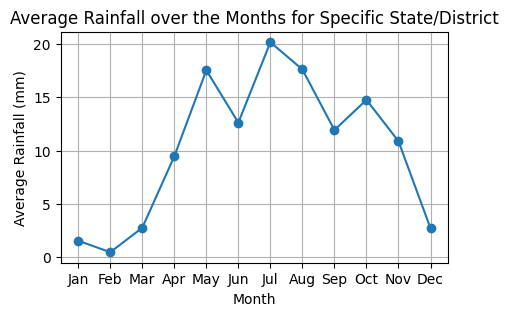

In [ ]:
# Group data by month and calculate average rainfall for each month
average_rainfall_over_months = specific_state_district_data.groupby('Month')['Avg_rainfall'].mean()
# Create a line plot
plt.figure(figsize=(5, 3))
plt.plot(average_rainfall_over_months.index, average_rainfall_over_months.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.title('Average Rainfall over the Months for Specific State/District')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


In [ ]:
#Tamil Nadu,Chennai
state_code = 31
district_code = 126
# Filter data for the specific state and district
specific_state_district_data = data_df[(data_df['State_Encoded'] == state_code) & (data_df['District_Encoded'] == district_code)]

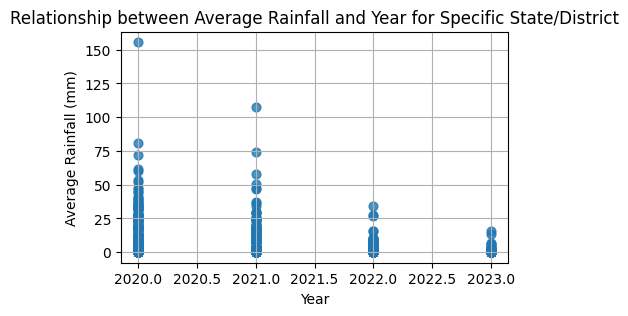

In [ ]:
plt.figure(figsize=(5, 3))
plt.scatter(specific_state_district_data['Year'], specific_state_district_data['Avg_rainfall'], marker='o', s=40, alpha=0.8)
plt.xlabel('Year')
plt.ylabel('Average Rainfall (mm)')
plt.title('Relationship between Average Rainfall and Year for Specific State/District')
plt.grid(True)
plt.show()

In [ ]:
#Arunachal Pradesh,Dibang Valley
state_code = 2
district_code = 172

# Filter data for the specific state and district
specific_state_district_data = data_df[(data_df['State_Encoded'] == state_code) & (data_df['District_Encoded'] == district_code)]

In [ ]:
# Group data by year and month, and calculate the average rainfall for each combination
average_rainfall_by_year_month = specific_state_district_data.groupby(['Year', 'Month'])['Avg_rainfall'].mean()

# Reset index to make 'year' and 'month' regular columns
average_rainfall_by_year_month = average_rainfall_by_year_month.reset_index()

# Pivot the data to create a stacked bar plot-friendly format
pivot_table = average_rainfall_by_year_month.pivot(index='Year', columns='Month', values='Avg_rainfall')


<Figure size 300x200 with 0 Axes>

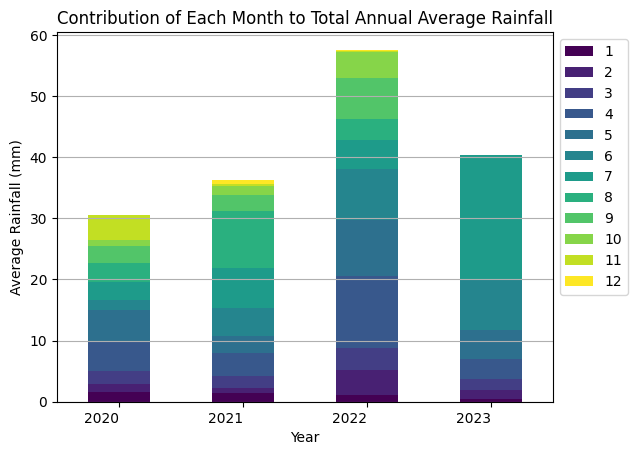

In [ ]:
# Create a stacked bar plot
plt.figure(figsize=(3, 2))
pivot_table.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Year')
plt.xticks(rotation=0, ha='right')
plt.ylabel('Average Rainfall (mm)')
plt.title('Contribution of Each Month to Total Annual Average Rainfall')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.grid(axis='y')
plt.show()

In [ ]:
specific_year = 2023

# Filter data for the specific year
specific_year_data = data_df[data_df['Year'] == specific_year]

In [ ]:
# Group data by state or district and calculate the total average rainfall for each state or district
total_average_rainfall_by_location = specific_year_data.groupby([ 'State_Encoded'])['Avg_rainfall'].sum()

# Calculate the total average rainfall for all states or districts combined
total_average_rainfall_all_locations = total_average_rainfall_by_location.sum()

# Calculate the percentage distribution of average rainfall across states or districts
percentage_distribution = (total_average_rainfall_by_location / total_average_rainfall_all_locations) * 100


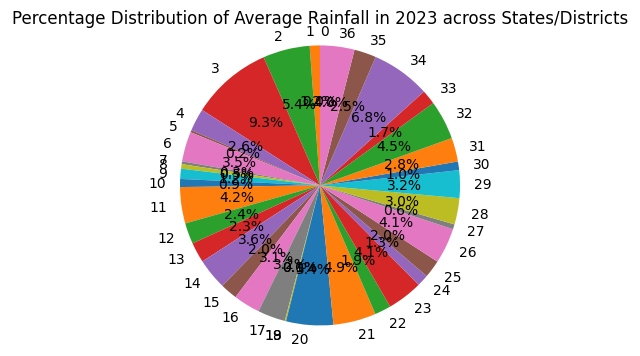

In [ ]:
import matplotlib.pyplot as plt

# Create a pie chart
plt.figure(figsize=(8,4))
plt.pie(percentage_distribution, labels=percentage_distribution.index, autopct='%.1f%%', startangle=90)
plt.axis('equal')
plt.title(f'Percentage Distribution of Average Rainfall in {specific_year} across States/Districts')
plt.show()


In [ ]:
# Group the data by 'State' and 'Month' and calculate the average rainfall for each combination
average_rainfall_by_month_state = data_df.groupby(['State', 'Month'])['Avg_rainfall'].mean().reset_index()

# Create a relationship table using pivot_table method
relationship_table = pd.pivot_table(average_rainfall_by_month_state,
                                    index='State',
                                    columns='Month',
                                    values='Avg_rainfall',
                                    aggfunc='mean')

# Print the relationship table
print(relationship_table.head(10))

Month                       1         2         3         4          5   \
State                                                                     
Andaman & Nicobar     0.004216  0.000000  0.000000  0.000000   0.000000   
Andhra Pradesh        0.322640  0.138987  0.668500  1.789695   3.029081   
Arunachal Pradesh     1.325755  1.958602  2.283947  4.522475   7.019072   
Assam                 0.832966  1.097769  1.998451  6.834538  10.360078   
Bihar                 0.489510  0.701120  0.724176  1.418035   4.635631   
Chandigarh            4.580842  1.305629  2.850549  2.281682   2.565579   
Chhattisgarh          0.948312  0.724082  1.193466  1.750534   2.596836   
Dadra & Nagar Haveli  0.063920  0.006814  0.173166  0.038005   2.732057   
Daman & Diu           0.324282  0.001309  0.091051  0.025094   7.345191   
Delhi                 3.325374  1.088631  3.880489  0.729446   8.652314   

Month                        6          7          8          9         10  \
State                

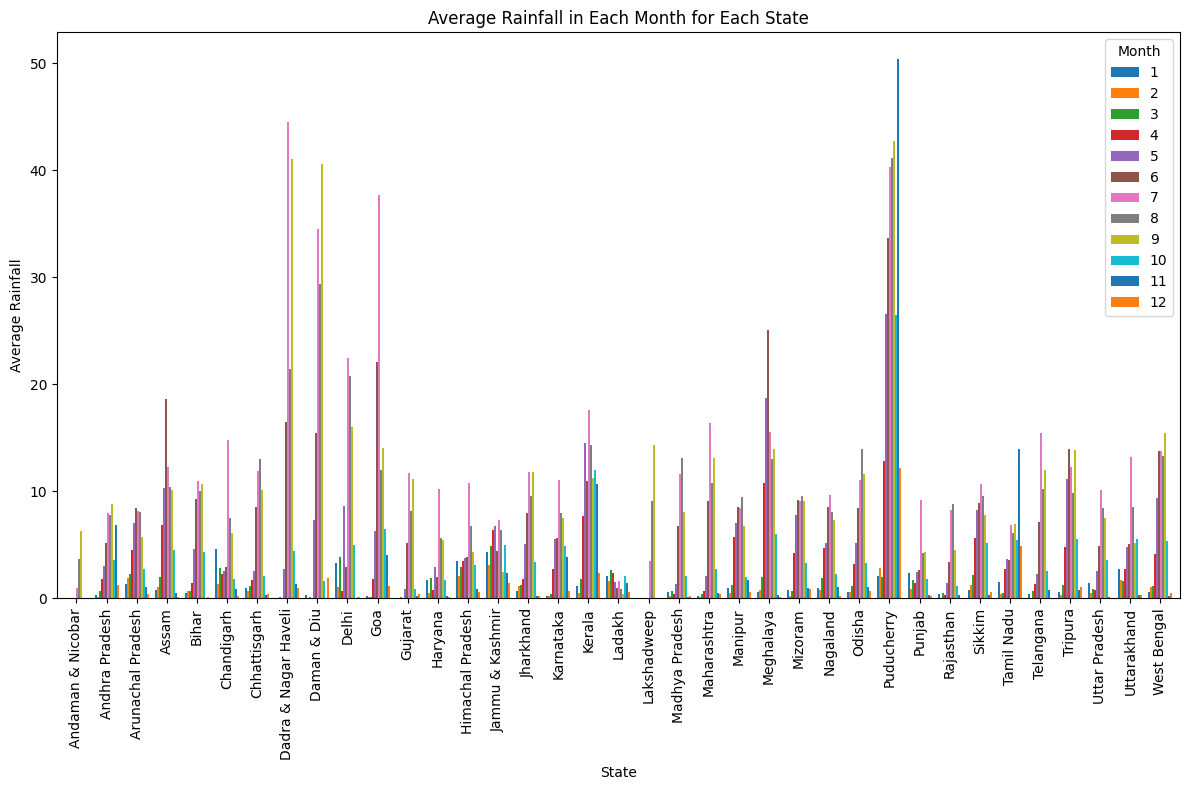

In [ ]:
# Create the bar graph
plt.figure(figsize=(12, 8))
relationship_table.plot(kind='bar', stacked=False,ax=plt.gca(), width=0.8)
plt.xlabel('State')
plt.ylabel('Average Rainfall')
plt.title('Average Rainfall in Each Month for Each State')

# Show the legend
plt.legend(title='Month', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train a machine learning model using the historical data
# Split the data into features (X) and target (y)
X = data_df[['State_Encoded', 'Month']]  # Use the relevant features
y = data_df['Avg_rainfall']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
ypred=model.predict(X_test)
ypred

array([4.51624462, 3.72180193, 5.80864084, ..., 6.5224978 , 5.29725636,
       4.93361241])

In [ ]:
#Evaluating the model
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

print("MSE% :",mean_absolute_percentage_error(y_test,ypred))
print("RMSE :",np.sqrt(mean_squared_error(y_test,ypred)))
print("r2score :",r2_score(y_test,ypred))

MSE% : 8159154760589716.0
RMSE : 15.719677408997079
r2score : 0.005960298953225807


In [ ]:
# Define the months
months = [8,9,10,11,12]

In [ ]:
# Create a list of dictionaries to hold the predicted data
predicted_data = []



In [ ]:
state_code = 17

# Filter data for the specific state and district
specific_state_district_data = data_df[(data_df['State_Encoded'] == state_code)]


In [ ]:
# Sample new data (replace this with your actual data for the next 5 months in 2023)
new_data = {
    'State_Encoded': [state_code] * 5,  # Replace 'state_encoded' with the encoded value for the state
    'Month': [8, 9, 10, 11, 12],  # Encoded values for August, September, October, November, December
}

# Create a DataFrame from the new data
new_data_df = pd.DataFrame(new_data)
new_data_df

,State_Encoded,Month
0,17,8
1,17,9
2,17,10
3,17,11
4,17,12


In [ ]:
# Use the trained model to make predictions for the new data
predicted_rainfall = model.predict(new_data_df)
predicted_rainfall


array([5.27039445, 5.62060745, 5.97082045, 6.32103345, 6.67124644])

In [ ]:
months_encoded_2023 = [8,9,10,11,12]

In [ ]:
states = ['Andaman & Nicobar','Andhra Pradesh','Arunachal Pradesh','Assam','Bihar','Chandigarh','Chhattisgarh','Dadra & Nagar Haveli','Daman & Diu',
          'Delhi','Goa','Gujarat','Haryana','Himachal Pradesh','Jammu & Kashmir','Jharkhand','Karnataka','Kerala','Ladakh','Lakshadweep','Madhya Pradesh',
          'Maharashtra','Manipur','Meghalaya','Mizoram','Nagaland','Odisha','Puducherry','Punjab','Rajasthan','Sikkim','Tamil Nadu','Telangana','Tripura',
          'Uttar Pradesh','Uttarakhand','West Bengal']


In [ ]:
# Create a list of dictionaries to hold the predicted data
predicted_data = []

In [ ]:
# Make predictions for each state and month in 2023
for month_encoded, month in zip(months_encoded_2023, ['August', 'September', 'October', 'November', 'December']):
    for state in states:
        state_encoded = data_df[data_df['State'] == state]['State_Encoded'].iloc[0]
        new_data = {'State_Encoded':state_encoded,'Month': month_encoded}
        predicted_rainfall = model.predict(pd.DataFrame([new_data]))[0]
        new_data['State'] = state
        new_data['Predicted Average Rainfall'] = predicted_rainfall
        predicted_data.append(new_data)

In [ ]:
#Create a DataFrame to store the predicted data
summary_table = pd.DataFrame(predicted_data)

In [ ]:
#Print the summary table with the predictions
print(summary_table.head(50))

    State_Encoded  Month                 State  Predicted Average Rainfall
0               0      8     Andaman & Nicobar                    5.498721
1               1      8        Andhra Pradesh                    5.485290
2               2      8     Arunachal Pradesh                    5.471859
3               3      8                 Assam                    5.458428
4               4      8                 Bihar                    5.444997
5               5      8            Chandigarh                    5.431566
6               6      8          Chhattisgarh                    5.418135
7               7      8  Dadra & Nagar Haveli                    5.404704
8               8      8           Daman & Diu                    5.391273
9               9      8                 Delhi                    5.377842
10             10      8                   Goa                    5.364411
11             11      8               Gujarat                    5.350980
12             12      8 

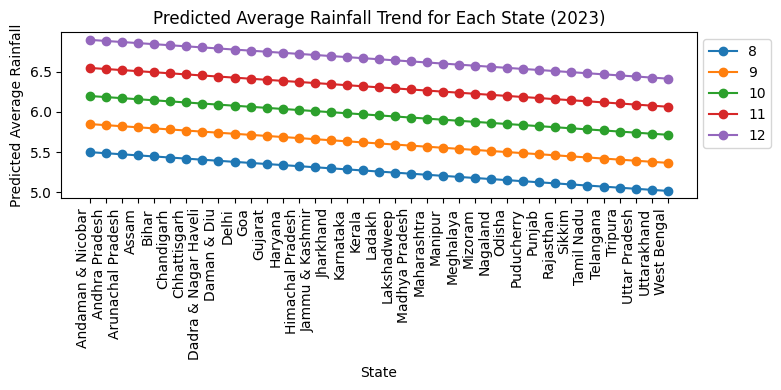

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the 'summary_table' DataFrame containing the predicted data

# Sort the summary_table by 'State' and 'Month' for better visualization
summary_table = summary_table.sort_values(by=['State', 'Month'])

# Create the line chart with dots
plt.figure(figsize=(8, 4))  # Set the figure size

# Extract data for plotting
states = summary_table['State'].unique()
months = summary_table['Month'].unique()

# Define marker styles for each month
marker_styles = ['o', 'o', 'o', 'o', 'o']

# Plot the lines with dots for each month
for i, month in enumerate(months):
    month_data = summary_table[summary_table['Month'] == month]
    plt.plot(month_data['State'], month_data['Predicted Average Rainfall'], marker=marker_styles[i], label=month)

# Customize the plot
plt.xlabel('State')
plt.ylabel('Predicted Average Rainfall')
plt.title('Predicted Average Rainfall Trend for Each State (2023)')
plt.xticks(rotation=90, ha='right')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()
